2번
코로나19에 대한 나라별 데이터로 모델링 진행  
데이터 출처 : https://www.kaggle.com/imdevskp/corona-virus-report 일부 후처리  
데이터 경로 : /kaggle/input/adp-kr-p3/problem2.csv
컬럼  

- location : 지역명
- date : 일자
- total_cases : 누적 확인자
- total_deaths : 누적 사망자
- new_tests : 검사자
- population : 인구
- new_vaccinations : 백신 접종자

2-1) 마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라  
상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라  
2-2) 코로나 위험지수를 직접 만들고 그 위험지수에 대한 설명을 적고 위험지수가 높은 국가들 10개를 선정해서 시각화  
2-3) 한국의 코로나 확진자 예측해라(선형 시계열모델 + 비선형시계열 모델 2개 만들어라)  
누적 확진자, 누적 사망자를 Y로 두고, 모델을 만드는데 평가는 누적 확진자가 아닌 일일 확진자 or 일일 사망자로 하여라  

3번  
설문조사 데이터
데이터 출처 : 자체 제작
데이터 경로 : /kaggle/input/adp-kr-p3/problem3.csv

데이터 설명 : A ~ D까지의 그룹에게 각각 같은 설문조사를 하여 1-1,1-2,1-3...5-1,5-4 인 설문지를 푼 것이다. 문항은 영역별로 나뉘어 있고, 영역은 크게 5개이다(1~5)
각 영역의 세부문항은 4개씩 존재한다 (1-1,1-2,1-3,1-4 ~) 이 때 중간에 반대 문항이 들어가 있다. 예를 들어 1-1 문제가 "나는 시간약속을 잘 지킨다."라는 문제라면 1-3의 문제는 "나는 시간약속을 잘 지키지 않는다." 라는 역문제로 구성 되어있다. 각 영역의 3번문항의 1번문항의 역문제이다. 모든 답변은 5점 척도이다. 문제를 풀기전 모든 역문항의 경우 점수를 변환(6점을 빼서) 작업이 필요하다  
3-1) 각 그룹의 영역별 응답의 평균, 표준편차, 왜도, 첨도를 구하라.  
3-2) 그룹별로 Q1-1문항의 차이가 존재하는지 anova분석을 시행하라  
3-3) 탐색적 요인분석을 수행하고 결과를 시각화 하라  

## 2. 코로나19에 대한 나라별 데이터로 모델링 진행
### 2-1) 마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라. 상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df2 = pd.read_csv('/content/drive/MyDrive/data/adp/week13_기출3/problem2.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136931 entries, 0 to 136930
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   location          136931 non-null  object 
 1   date              136931 non-null  object 
 2   total_cases       129343 non-null  float64
 3   total_deaths      118074 non-null  float64
 4   new_tests         57061 non-null   float64
 5   population        135951 non-null  float64
 6   new_vaccinations  29414 non-null   float64
dtypes: float64(5), object(2)
memory usage: 7.3+ MB


In [ ]:
df2.head()

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
0,Afghanistan,2020-02-24,5.0,NaN,NaN,39835428.0,NaN
1,Afghanistan,2020-02-25,5.0,NaN,NaN,39835428.0,NaN
2,Afghanistan,2020-02-26,5.0,NaN,NaN,39835428.0,NaN
3,Afghanistan,2020-02-27,5.0,NaN,NaN,39835428.0,NaN
4,Afghanistan,2020-02-28,5.0,NaN,NaN,39835428.0,NaN


In [18]:
## 마지막 날 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가 출력
##date를 날짜형 변수로 바꿔줌
df2['date'] = pd.to_datetime(df2['date'], format = '%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  This is separate from the ipykernel package so we can avoid doing imports until


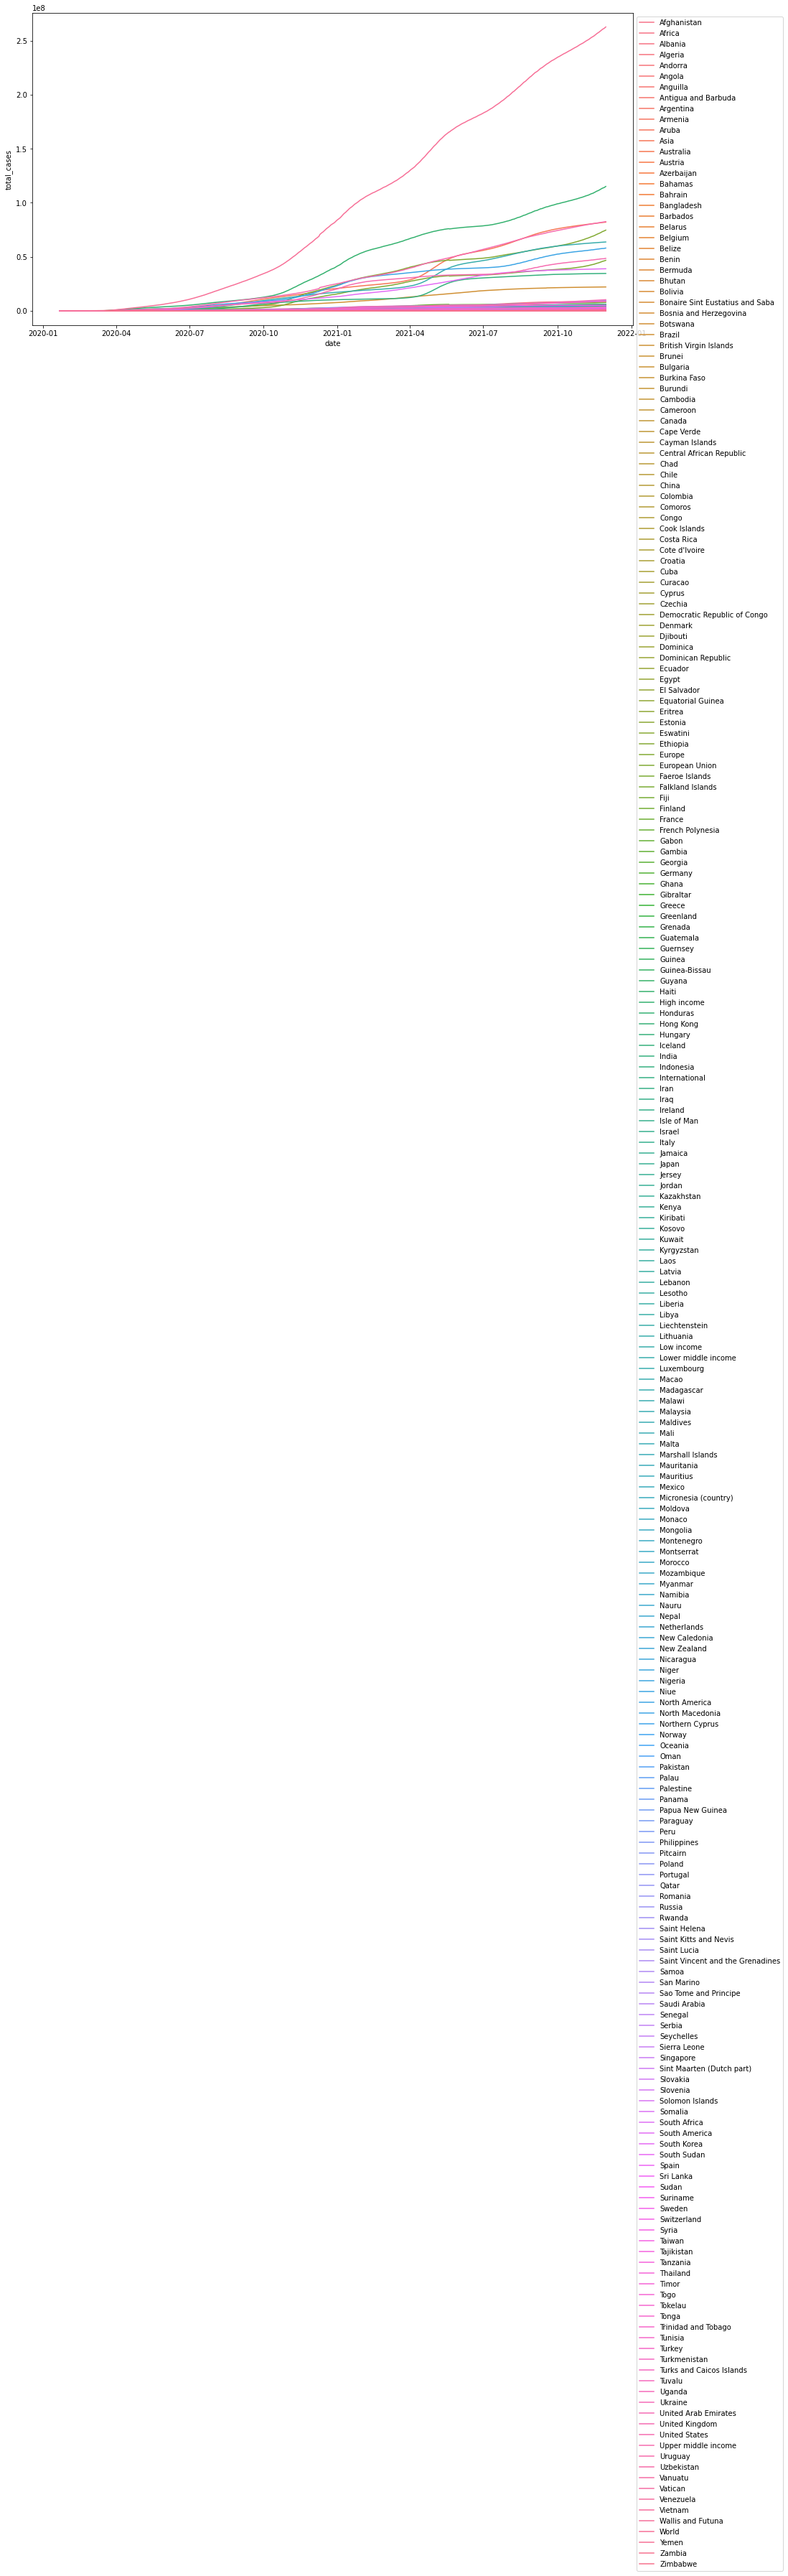

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x='date', y='total_cases', hue='location', data=df2)
plt.locator_params(axis='x', nbins=10)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

In [19]:
df2_1 = df2[df2['date'] == max(df2['date'])]
df2_1.nlargest(5,['total_cases'])

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
135086,World,2021-11-30,262797494.0,5215291.0,NaN,7.874966e+09,NaN
53483,High income,2021-11-30,115119076.0,1830909.0,NaN,1.214930e+09,NaN
130582,Upper middle income,2021-11-30,82564891.0,2192456.0,NaN,2.513673e+09,NaN
7044,Asia,2021-11-30,82102069.0,1218500.0,NaN,4.678445e+09,NaN
40923,Europe,2021-11-30,74697774.0,1420111.0,NaN,7.489630e+08,NaN


상위 n개의 국가를 구해야 하는데 location에 국가가 아닌 다른 범주가 포함되어 있다. 국가가 아닌 범주는 데이터에서 완전히 삭제하도록 하겠음

In [20]:
df2_1.nlargest(20,['population']) ##대륙, 국가 외 카테고리는 개별국가보다 인구수가 많을 것이기 때문에 인구수 column이 큰 데이터를 확인

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
135086,World,2021-11-30,262797494.0,5215291.0,NaN,7.874966e+09,NaN
7044,Asia,2021-11-30,82102069.0,1218500.0,NaN,4.678445e+09,NaN
73522,Lower middle income,2021-11-30,63731411.0,1154562.0,NaN,3.330653e+09,NaN
130582,Upper middle income,2021-11-30,82564891.0,2192456.0,NaN,2.513673e+09,NaN
25907,China,2021-11-30,98901.0,4636.0,NaN,1.444216e+09,NaN
56744,India,2021-11-30,34587822.0,468980.0,NaN,1.393409e+09,NaN
1302,Africa,2021-11-30,8652562.0,222881.0,NaN,1.373486e+09,NaN
53483,High income,2021-11-30,115119076.0,1830909.0,NaN,1.214930e+09,NaN
40923,Europe,2021-11-30,74697774.0,1420111.0,NaN,7.489630e+08,NaN
72843,Low income,2021-11-30,1380503.0,37349.0,NaN,6.651490e+08,NaN


In [21]:
del_list = ['World', 'Asia', 'Lower middle income', 'Upper middle income', 'High income', 'Europe', 'Low income', 'North America', 'European Union', 'South America']

df2.drop(df2.index[df2['location'].isin(del_list)], inplace=True)

In [22]:
##최종적으로 인구 대비 확진자 비율 상위 5개 데이터를 출력
df2_1 = df2[df2['date'] == max(df2['date'])]
df2_1['확진자비율'] = df2_1['total_cases']/df2_1['population']
df2_1.nlargest(5,'확진자비율')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,확진자비율
83449,Montenegro,2021-11-30,157376.0,2307.0,NaN,628051.0,NaN,0.250578
108918,Seychelles,2021-11-30,23417.0,125.0,NaN,98910.0,NaN,0.236751
3231,Andorra,2021-11-30,17115.0,131.0,NaN,77354.0,NaN,0.221256
111048,Slovakia,2021-11-30,1170200.0,14418.0,NaN,5460726.0,NaN,0.214294
46158,Georgia,2021-11-30,845643.0,12054.0,NaN,3979773.0,NaN,0.212485


In [23]:
sol_list = df2_1.nlargest(5,'확진자비율')['location'].values.tolist()

In [37]:
## 상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라

## 5개 국가 데이터만 뽑아내기 (전체 데이터로 볼 경우 null값이 많아서 핸들링하기 힘듦)
#df2_1 = df2.iloc[df2.index[df2['location'].isin(sol_list)]].reset_index()

## 일일 확진자의 수/ 일일 사망자의 수 구하기
df2['new_cases'] = df2['total_cases'].diff()
df2['new_deaths'] = df2['total_deaths'].diff()

In [30]:
df2[df2['location'] == sol_list[0]]

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
82826,Montenegro,2020-03-17,2.0,NaN,NaN,628051.0,NaN
82827,Montenegro,2020-03-18,2.0,NaN,NaN,628051.0,NaN
82828,Montenegro,2020-03-19,3.0,NaN,NaN,628051.0,NaN
82829,Montenegro,2020-03-20,14.0,NaN,NaN,628051.0,NaN
82830,Montenegro,2020-03-21,14.0,NaN,NaN,628051.0,NaN
...,...,...,...,...,...,...,...
83445,Montenegro,2021-11-26,156268.0,2281.0,NaN,628051.0,1428.0
83446,Montenegro,2021-11-27,156608.0,2283.0,NaN,628051.0,1373.0
83447,Montenegro,2021-11-28,156873.0,2285.0,NaN,628051.0,1077.0
83448,Montenegro,2021-11-29,157085.0,2300.0,NaN,628051.0,518.0


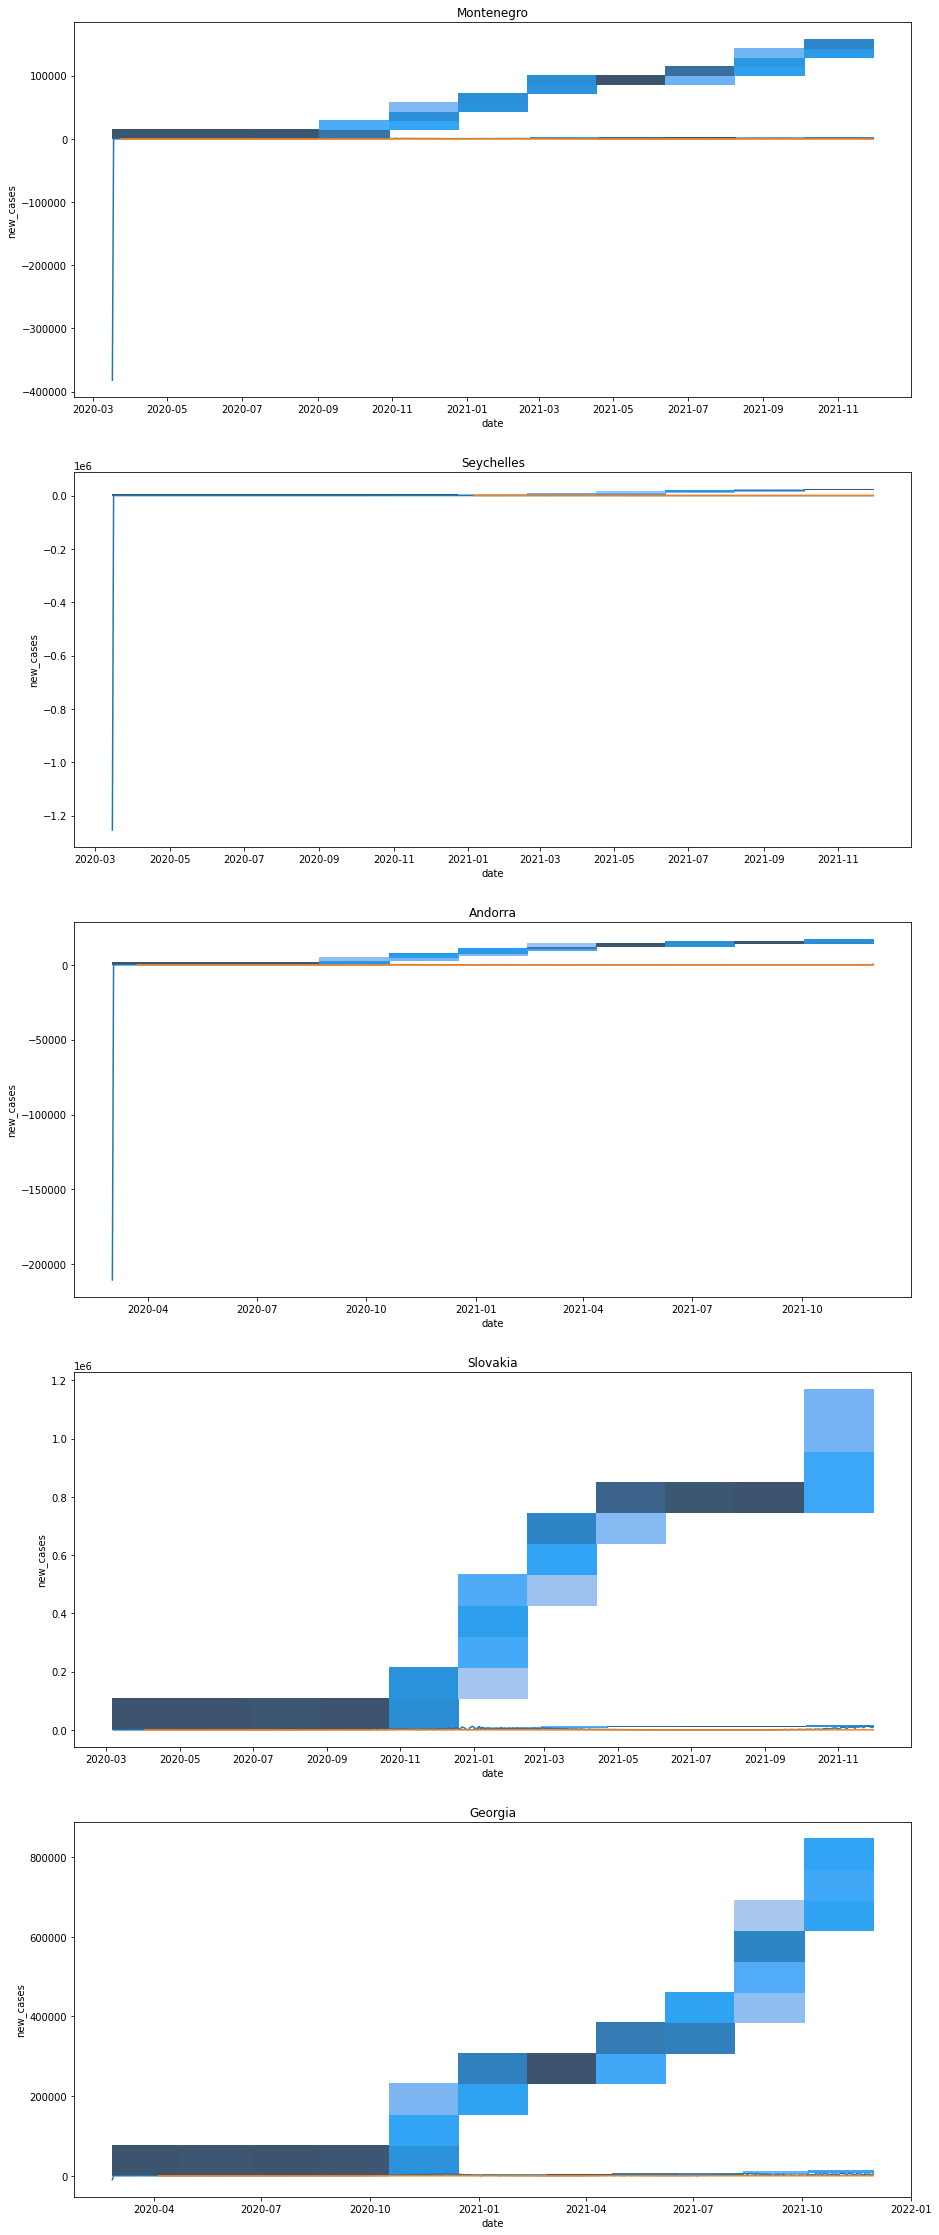

In [38]:
## 누적은 막대그래프로, 일일은 꺾은선 그래프로 표현
fig,axs = plt.subplots(5, figsize = (15, 40))
#kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
for i in range(0,5):
  sns.lineplot(ax = axs[i], x = 'date', y = )
  #sns.lineplot(ax = axs[i], x = 'date', y = 'new_cases', data = df2[df2['location'] == sol_list[i]])
  #sns.lineplot(ax = axs[i], x = 'date', y = 'new_deaths', data = df2[df2['location'] == sol_list[i]])
  #sns.histplot(ax = axs[i], x = 'date', y = 'total_cases', data = df2[df2['location'] == sol_list[i]])
  #sns.histplot(ax = axs[i], x = 'date', y = 'total_deaths', data = df2[df2['location'] == sol_list[i]])
  axs[i].set_title(sol_list[i])
plt.show()

In [ ]:
df2.iloc[df2.index[df2['location'].isin(sol_list)]] ## 왜 맘대로 핸들링이 안될 까ㅏ..

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
2593,Andorra,2020-03-02,1.0,NaN,NaN,77354.0,NaN
2594,Andorra,2020-03-03,1.0,NaN,NaN,77354.0,NaN
2595,Andorra,2020-03-04,1.0,NaN,NaN,77354.0,NaN
2596,Andorra,2020-03-05,1.0,NaN,NaN,77354.0,NaN
2597,Andorra,2020-03-06,1.0,NaN,NaN,77354.0,NaN
...,...,...,...,...,...,...,...
116411,Sri Lanka,2021-02-16,77184.0,409.0,13585.0,21497306.0,3225.0
116412,Sri Lanka,2021-02-17,77906.0,422.0,15386.0,21497306.0,14242.0
116413,Sri Lanka,2021-02-18,78420.0,430.0,15554.0,21497306.0,23067.0
116414,Sri Lanka,2021-02-19,78937.0,433.0,15909.0,21497306.0,30307.0


### 2-2) 코로나 위험지수를 직접 만들고 그 위험지수에 대한 설명을 적고 위험지수가 높은 국가들 10개를 선정해서 시각화

### 2-3) 한국의 코로나 확진자 예측해라(선형 시계열모델 + 비선형시계열 모델 2개 만들어라)
누적 확진자, 누적 사망자를 Y로 두고, 모델을 만드는데 평가는 누적 확진자가 아닌 일일 확진자 or 일일 사망자로 하여라

In [40]:
df2[df2['location'].str.contains('Korea')]

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,new_cases,new_deaths
114068,South Korea,2020-01-21,NaN,NaN,NaN,51305184.0,NaN,NaN,NaN
114069,South Korea,2020-01-22,1.0,NaN,5.0,51305184.0,NaN,NaN,NaN
114070,South Korea,2020-01-23,1.0,NaN,NaN,51305184.0,NaN,0.0,NaN
114071,South Korea,2020-01-24,2.0,NaN,NaN,51305184.0,NaN,1.0,NaN
114072,South Korea,2020-01-25,2.0,NaN,NaN,51305184.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...
114743,South Korea,2021-11-26,436968.0,3492.0,NaN,51305184.0,438663.0,4067.0,52.0
114744,South Korea,2021-11-27,440896.0,3548.0,NaN,51305184.0,150683.0,3928.0,56.0
114745,South Korea,2021-11-28,444200.0,3580.0,NaN,51305184.0,5386.0,3304.0,32.0
114746,South Korea,2021-11-29,447230.0,3624.0,NaN,51305184.0,314476.0,3030.0,44.0


In [41]:
df2_kor = df2[df2['location']=='South Korea']

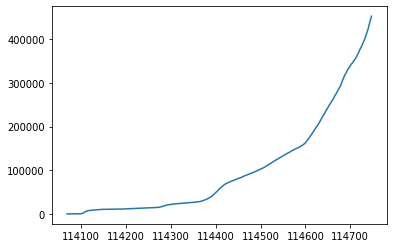

In [42]:
df2_kor['total_cases'].plot()

## 설문조사 데이터 데이터
데이터 설명 : A ~ D까지의 그룹에게 각각 같은 설문조사를 하여 1-1,1-2,1-3...5-1,5-4 인 설문지를 푼 것이다. 문항은 영역별로 나뉘어 있고, 영역은 크게 5개이다(1~5) 각 영역의 세부문항은 4개씩 존재한다 (1-1,1-2,1-3,1-4 ~) 이 때 중간에 반대 문항이 들어가 있다. 예를 들어 1-1 문제가 "나는 시간약속을 잘 지킨다."라는 문제라면 1-3의 문제는 "나는 시간약속을 잘 지키지 않는다." 라는 역문제로 구성 되어있다. 각 영역의 3번문항의 1번문항의 역문제이다. 모든 답변은 5점 척도이다. 문제를 풀기전 모든 역문항의 경우 점수를 변환(6점을 빼서) 작업이 필요하다
### 3-1) 각 그룹의 영역별 응답의 평균, 표준편차, 왜도, 첨도를 구하라.

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/data/adp/week13_기출3/problem3.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userid  1000 non-null   int64 
 1   group   1000 non-null   object
 2   Q1-1    1000 non-null   int64 
 3   Q1-2    1000 non-null   int64 
 4   Q1-3    1000 non-null   int64 
 5   Q1-4    1000 non-null   int64 
 6   Q2-1    1000 non-null   int64 
 7   Q2-2    1000 non-null   int64 
 8   Q2-3    1000 non-null   int64 
 9   Q2-4    1000 non-null   int64 
 10  Q3-1    1000 non-null   int64 
 11  Q3-2    1000 non-null   int64 
 12  Q3-3    1000 non-null   int64 
 13  Q3-4    1000 non-null   int64 
 14  Q4-1    1000 non-null   int64 
 15  Q4-2    1000 non-null   int64 
 16  Q4-3    1000 non-null   int64 
 17  Q4-4    1000 non-null   int64 
 18  Q5-1    1000 non-null   int64 
 19  Q5-2    1000 non-null   int64 
 20  Q5-3    1000 non-null   int64 
 21  Q5-4    1000 non-null   int64 
dtypes: int64(21), object(1)
m

In [ ]:
df3.head()

,userid,group,Q1-1,Q1-2,Q1-3,Q1-4,Q2-1,Q2-2,Q2-3,Q2-4,Q3-1,Q3-2,Q3-3,Q3-4,Q4-1,Q4-2,Q4-3,Q4-4,Q5-1,Q5-2,Q5-3,Q5-4
0,0,A,5,2,1,2,4,5,3,3,4,4,1,1,5,2,5,3,3,4,3,4
1,1,A,2,2,3,3,4,3,1,4,4,2,2,3,4,3,5,3,1,2,1,1
2,2,A,1,3,4,4,2,1,4,4,4,4,4,2,1,3,4,1,3,3,2,5
3,3,A,3,3,4,2,2,4,4,3,2,4,2,3,3,4,2,4,1,1,3,2
4,4,A,3,1,2,3,4,3,4,1,1,3,5,1,3,2,3,1,3,2,5,4


In [ ]:
### 역코딩하기 (-6점 후 절대값)
def reverse_score(x):
  return abs(x-6)

df3[['Q1-3', 'Q2-3', 'Q3-3', 'Q4-3', 'Q5-3']] = df3[['Q1-3', 'Q2-3', 'Q3-3', 'Q4-3', 'Q5-3']].apply(lambda x: reverse_score(x))
df3.head()

,userid,group,Q1-1,Q1-2,Q1-3,Q1-4,Q2-1,Q2-2,Q2-3,Q2-4,Q3-1,Q3-2,Q3-3,Q3-4,Q4-1,Q4-2,Q4-3,Q4-4,Q5-1,Q5-2,Q5-3,Q5-4
0,0,A,5,2,5,2,4,5,3,3,4,4,5,1,5,2,1,3,3,4,3,4
1,1,A,2,2,3,3,4,3,5,4,4,2,4,3,4,3,1,3,1,2,5,1
2,2,A,1,3,2,4,2,1,2,4,4,4,2,2,1,3,2,1,3,3,4,5
3,3,A,3,3,2,2,2,4,2,3,2,4,4,3,3,4,4,4,1,1,3,2
4,4,A,3,1,4,3,4,3,2,1,1,3,1,1,3,2,3,1,3,2,1,4


In [ ]:
result = pd.concat([df3.mean(),df3.std(), df3.kurt(), df3.skew()], axis = 1)
result.rename({0:'평균', 1:'표준편차', 2:'첨도', 3:'왜도'}, axis = 1, inplace = True)
result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,평균,표준편차,첨도,왜도
Q1-1,2.941,1.299695,-1.155706,-0.054870
Q1-2,3.048,1.258284,-1.042385,-0.087540
Q1-3,3.103,1.167799,-0.972343,-0.023347
Q1-4,2.987,1.279245,-1.099664,-0.107916
Q2-1,3.072,1.266657,-1.050035,-0.153286
Q2-2,3.059,1.289644,-1.084178,-0.160532
Q2-3,3.121,1.171209,-1.013027,-0.037591
Q2-4,3.008,1.276544,-1.036958,-0.133594
Q3-1,2.997,1.300262,-1.121215,-0.092985
Q3-2,3.016,1.279602,-1.078710,-0.101737


In [ ]:
### 신뢰도 측정하기 (Cronbach's alpha)
def cronbach_alpha(df):
  df_corr = df.corr()
  N = df.shape[1] ##응답항목 개수
  rs = np.array([]) ## 영역 내 응답항목의 correaltion값
  for i, col in enumerate(df_corr.columns):
    sum_ = df_corr[col][i+1: ].values
    rs = np.append(sum_, rs)
  mean_r = np.mean(rs)  ##영역 내 응답항목 간 correlation 평균
  cronbach_alpha = (N * mean_r) / (1+ (N-1) * mean_r)
  return cronbach_alpha

In [ ]:
factors = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
items = df3.columns.tolist()[1:]
factors_items_dict = {}
for factor in factors:
  factors_items_dict[factor] = [x for x in items if x[:2]==factor]

In [ ]:
factors_items_dict['Q1']

['Q1-1', 'Q1-2', 'Q1-3', 'Q1-4']

In [ ]:
### 영역별로 크론바흐알파 계수 출력
for key,value in factors_items_dict.items():
  print('%s 영역 크론바흐 알파 계수: %s', key, cronbach_alpha(df3[value]))

%s 영역 크론바흐 알파 계수: %s Q1 -0.02585815044741423
%s 영역 크론바흐 알파 계수: %s Q2 -0.007790103824956966
%s 영역 크론바흐 알파 계수: %s Q3 -0.06187591729785392
%s 영역 크론바흐 알파 계수: %s Q4 0.0561827683324441
%s 영역 크론바흐 알파 계수: %s Q5 -0.013729310127429221


일반적으로 크론바흐 알파 계수는 0~1 사이의 값을 가지게 되는데, 음수의 값을 가지게 된 이유는 같은 영역 간 결과점수 상관성이 낮았기 때문이다. 따라서 이 설문조사 결과를 신뢰하기 어렵다.

### 3-2) 그룹별로 Q1-1문항의 차이가 존재하는지 anova분석을 시행하라

In [ ]:
df3[['group', 'Q1-1']].groupby('group').mean()

,Q1-1
group,
A,2.908
B,2.844
C,3.084
D,2.928


In [ ]:
### ANOVA 수행
from scipy.stats import f_oneway

df3_group = df3.groupby('group')
df3_test = [df3_group.get_group(x)['Q1-1'].to_numpy() for x in df3_group.groups]

f_oneway(df3_test[0], df3_test[1], df3_test[2], df3_test[3])

F_onewayResult(statistic=1.5375165204138734, pvalue=0.20318120426029868)

'group' 변수 하나가 Q1-1 점수에 미치는 영향을 알아보는 분산분석이기 때문에 One-way ANOVA를 사용하였다. 귀무가설과 연구가설은 아래와 같다.   
귀무가설: 4개 집단의 평균은 모두 같다 (mu1 = mu2 = mu3 = mu4)  
연구가설: 4개 집단 중 적어도 하나의 평균이 다르다  
검정 결과 F통계량이 약 1.53, p-value는 0.2 정도로 귀무가설을 기각할 수 없기 때문에 group 변수의 네 집단 간 평균의 차이가 없다고 볼 수 있다. 

### 3-3) 탐색적 요인분석을 수행하고 결과를 시각화하라

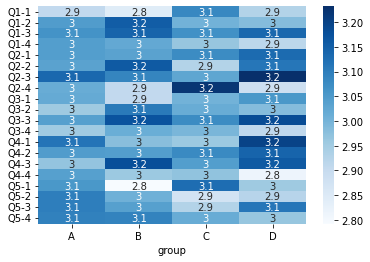

In [ ]:
### 그룹별 문항 평균
#df3.drop(columns = ['userid'], inplace = True)
sns.heatmap(df3.groupby('group').mean().T, annot = True, cmap = 'Blues')

그룹별로 특정 영역에 높은 점수가 나오는 집단이 있느지 살펴보려고 했으나 뚜렷한 경향성은 보이지 않았다. 같은 그룹, 같은 영역에 속해있어도 특정 응답 점수가 낮은 평균을 보이는 것으로 보아 응답의 신뢰도가 낮다는 사실을 다시 확인 가능하다. 

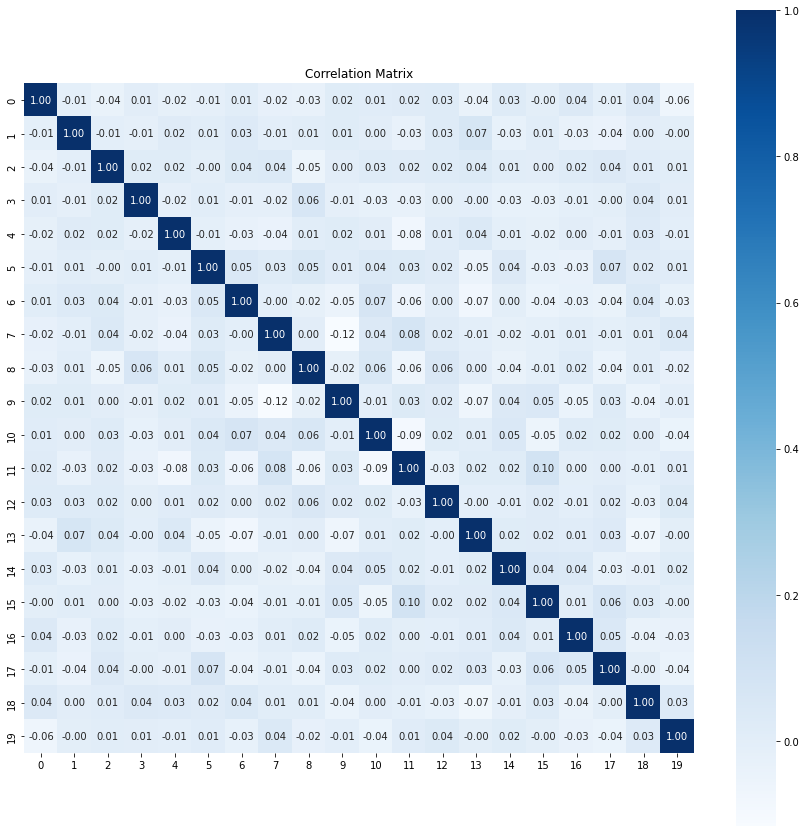

In [ ]:
### 변수들 간 Heatmap 그리고 해석
from scipy.stats import spearmanr
df3.drop(columns = ['userid', 'group'], inplace = True)
correlation = spearmanr(df3)

fig, ax = plt.subplots(figsize=(15,15))  ## 그림사이즈
plt.title("Correlation Matrix")
sns.heatmap(correlation.correlation, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Blues', ax = ax)

Spearman 상관관계를 이용해 응답 간 상관관계를 알아보려고 했다. 임의로 만들어진 데이터이기 때문에 응답결과 간 상관성이 모두 낮게 나오는데, 실제로는 같은 영역끼리 높은 상관성을 보여야 한다. 

In [ ]:
### Factor Analyzer(요인분석)
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors = 8, method = 'ml', rotation = 'promax')
fa.fit( df3.iloc[:, 1:] )

FactorAnalyzer(method='ml', n_factors=8, rotation_kwargs={})

In [ ]:
result= pd.DataFrame(fa.loadings_, index = df3.iloc[:, 1:].columns)

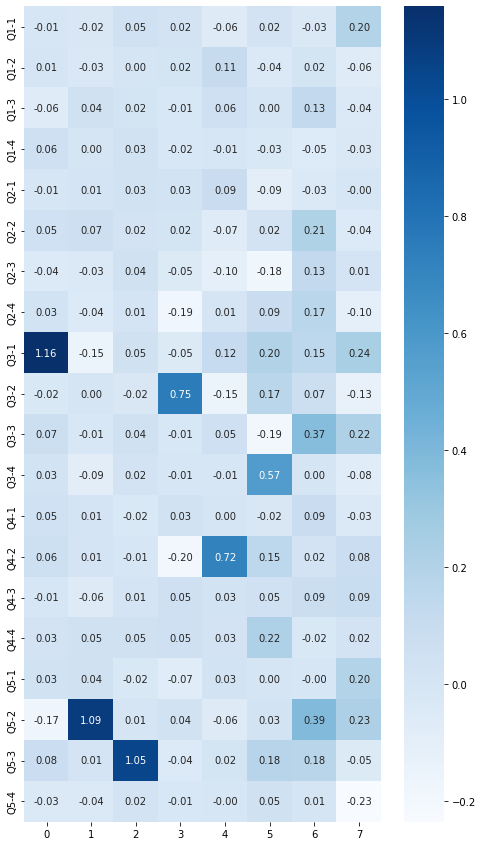

In [ ]:
plt.figure(figsize = (8, 15))
sns.heatmap(result, cmap = 'Blues', annot = True, fmt = '.2f')

탐색적 요인 분석을 통해 비슷한 결과가 나오는 응답항목들을 묶고, 한가지 개념으로 추상화할 수 있다. 현재 데이터에 EFA 수행 시 비슷하게 묶이는 column이 보이지 않는다. 

레퍼런스  
[python을 이용한 탐색적 요인분석 EFA](https://hleecaster.com/python-factor-analysis/)


